In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv(r'C:\Users\hp\Desktop\nextround2\browser_rankings_data.csv')

In [12]:
df.head()

,browser_rankings,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,ID,Keyword,Rank,Country,Language,Date,App ID,Date of Last Description Change,Short Description,Long Description
1,1,browser,2,in,en,2020-12-16,net.fast.web.browser,2020-12-18,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows..."
2,2,browser,3,in,en,2020-12-16,com.android.chrome,2020-12-18,"Fast, simple, and secure. Google Chrome browse...","Google Chrome is a fast, easy to use, and secu..."
3,3,browser,4,in,en,2020-12-16,com.opera.browser,2021-02-27,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest..."
4,3,browser,4,in,en,2020-12-16,com.opera.browser,2020-12-18,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And..."


In [50]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header


In [14]:
df.head()

,ID,Keyword,Rank,Country,Language,Date,App ID,Date of Last Description Change,Short Description,Long Description
1,1,browser,2,in,en,2020-12-16,net.fast.web.browser,2020-12-18,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows..."
2,2,browser,3,in,en,2020-12-16,com.android.chrome,2020-12-18,"Fast, simple, and secure. Google Chrome browse...","Google Chrome is a fast, easy to use, and secu..."
3,3,browser,4,in,en,2020-12-16,com.opera.browser,2021-02-27,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest..."
4,3,browser,4,in,en,2020-12-16,com.opera.browser,2020-12-18,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And..."
5,4,browser,1,in,en,2020-12-16,com.cloudmosa.puffinTV,2021-02-07,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...


In [15]:
df.shape

(3066, 10)

In [16]:
df['Keyword'].value_counts()

android browser                 608
browser                         608
privacy browsers for android    370
ad free browser                 370
privacy browser                 370
best privacy browsers           370
fast browser                    370
Name: Keyword, dtype: int64

In [17]:
df['sd_length'] = df['Short Description'].str.len()

In [18]:
df['ld_length'] = df['Long Description'].str.len()

In [19]:
df.head()

,ID,Keyword,Rank,Country,Language,Date,App ID,Date of Last Description Change,Short Description,Long Description,sd_length,ld_length
1,1,browser,2,in,en,2020-12-16,net.fast.web.browser,2020-12-18,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows...",80,1255
2,2,browser,3,in,en,2020-12-16,com.android.chrome,2020-12-18,"Fast, simple, and secure. Google Chrome browse...","Google Chrome is a fast, easy to use, and secu...",79,2751
3,3,browser,4,in,en,2020-12-16,com.opera.browser,2021-02-27,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest...",84,3054
4,3,browser,4,in,en,2020-12-16,com.opera.browser,2020-12-18,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And...",84,3879
5,4,browser,1,in,en,2020-12-16,com.cloudmosa.puffinTV,2021-02-07,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...,58,1417


In [20]:
print(df[df['Rank'].isnull()])

0         ID                       Keyword Rank Country Language        Date  \
104      252         best privacy browsers  NaN      in       en  2020-12-19   
133      419               privacy browser  NaN      in       en  2020-12-21   
1114   32507                  fast browser  NaN      in       en  2021-01-14   
1761   63564  privacy browsers for android  NaN      in       en  2021-02-03   
1929   71790         best privacy browsers  NaN      in       en  2021-02-07   
1971   73877         best privacy browsers  NaN      in       en  2021-02-08   
2013   75963         best privacy browsers  NaN      in       en  2021-02-09   
2047   78197  privacy browsers for android  NaN      in       en  2021-02-10   
2052   78201         best privacy browsers  NaN      in       en  2021-02-10   
2137   82284         best privacy browsers  NaN      in       en  2021-02-12   
2177   84328         best privacy browsers  NaN      in       en  2021-02-13   
2216   86461         best privacy browse

In [51]:
df['Rank'] = pd.to_numeric(df['Rank'], errors='coerce')

In [52]:
df = df.dropna(subset=['Rank'])

In [53]:
df['Rank'] = df['Rank'].astype('int')

In [25]:
df.corr()['Rank']

0
Rank         1.000000
sd_length    0.208939
ld_length    0.362805
Name: Rank, dtype: float64

**Both short description and long description have positive correlation with with ranking, where long description is slightly more correlated than short description.**

In [26]:
# converts category from a string representation into an integer representation

df['ld_category'] = df['Long Description'].astype('category').cat.codes
df['sd_category'] = df['Short Description'].astype('category').cat.codes

In [27]:
df.corr()['Rank']

0
Rank           1.000000
sd_length      0.208939
ld_length      0.362805
ld_category    0.339430
sd_category   -0.222662
Name: Rank, dtype: float64

**Short description has negative correlation with Rank but long desription is positively correlated.**

In [63]:
df['App_ID_category'] = df['App ID'].astype('category').cat.codes

In [64]:
df.corr()['Rank']

0
Rank               1.000000
App_ID_category    0.528693
Name: Rank, dtype: float64

**Highly positive correlation of browser ranking with App ID.**

<function matplotlib.pyplot.show(close=None, block=None)>

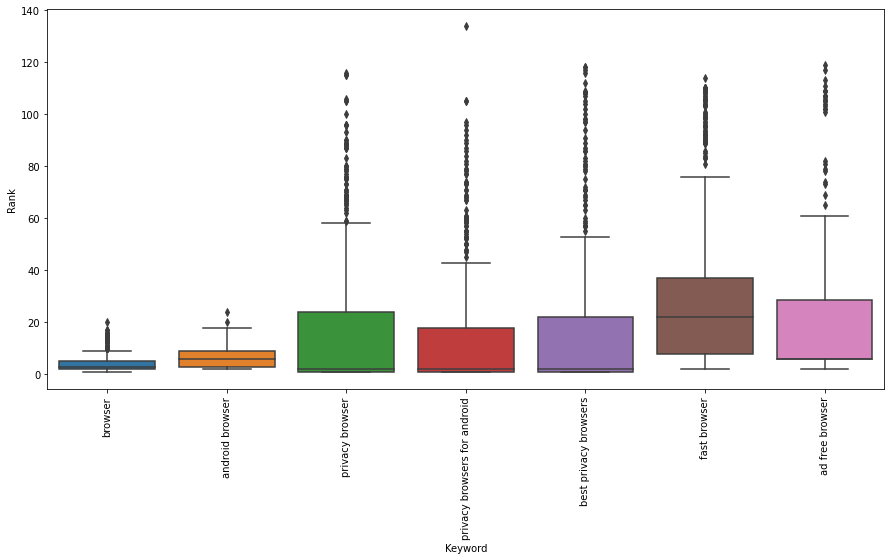

In [73]:
plt.figure(figsize=(15,7))
sns.boxplot(x = 'Keyword', y = 'Rank', data = df)
plt.xticks(rotation = 'vertical')
plt.show